# LeNet-5 model

### loading the dataset

In [ ]:
# loading the dataset 

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test)= mnist.load_data()


### preprocessing

In [ ]:
# pre-processing and normalizing the data

rows, cols= 28,28

# reshape 
x_train=x_train.reshape(x_train.shape[0],rows,cols,1)
x_test=x_test.reshape(x_test.shape[0],rows,cols,1)

input_shape=(rows,cols,1)
# convert the data type of input floating images to 32-bit floating point numbers 
x_train=x_train.astype('float32') # original images are generally 8-bit 
x_test=x_test.astype('float32')

# normalize the pixel values 

x_train=x_train/255.0
x_test=x_test/255.0

### define LeNet-5 model

In [ ]:
# define LeNet-5 model 

def build_lenet(input_shape):
    # define sequential model 
    model=tf.keras.Sequential()

    # c1 
    model.add(tf.keras.layers.Conv2D(filters=6,strides=(1,1),kernel_size=(5,5),activation='tanh',input_shape=input_shape))

    # s2
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))

    # c3
    model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1),kernel_size=(5,5),activation='tanh'))

    # s4
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))

    # c5 
    model.add(tf.keras.layers.Dense(units=120,activation='tanh'))

    # flatten
    model.add(tf.keras.layers.Flatten())

    # fc6

    model.add(tf.keras.layers.Dense(units=84,activation='tanh'))

    # output 

    model.add(tf.keras.layers.Dense(units=10,activation='softmax'))


    # compile the model

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    


    return model

### train and test 

In [ ]:
lenet = build_lenet(input_shape)

epochs=20
history=lenet.fit(x_train,y_train,epochs=epochs,batch_size=128,verbose=1)

loss,acc=lenet.evaluate(x_test,y_test)

print('Accuracy: ',acc)

x_train=x_train.reshape(x_train.shape[0],28,28)

print("Training Data",x_train.shape,y_train.shape)

x_test=x_test.reshape(x_test.shape[0],28,28)

print("Test Data",x_test.shape,y_test.shape)

# plot the image 

image_index=8888

plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')

# make prediction

pred=lenet.predict(x_test[image_index].reshape(1,rows,cols,1))

print("prediction: ",pred.argmax())

#### current - very bad, looking forward to improve

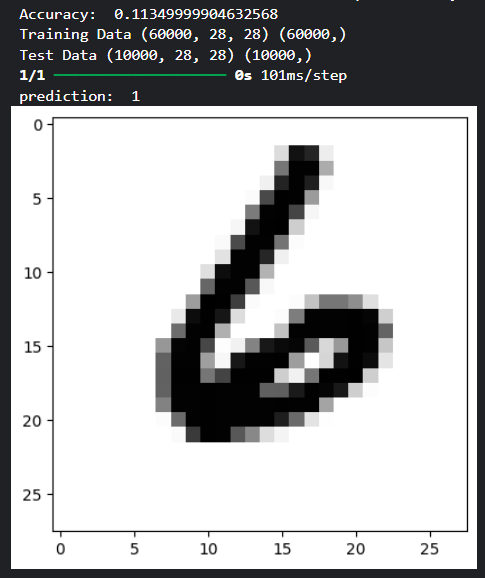